In [1]:
import scipy.stats as ss
import numpy as np
import scipy.stats as ss
import scanpy as sc
sc.set_figure_params(dpi=250, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
import pandas as pd
from multiprocessing import Pool
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

In [3]:
endo_data = sc.read("/home/gaurav/Gaurav/Berlin/Thesis/Paper/Hydra/Data/Objects/endo_hydra.h5ad")
ecto_data = sc.read("/home/gaurav/Gaurav/Berlin/Thesis/Paper/Hydra/Data/Objects/ecto_hydra.h5ad")

In [4]:
# Log-fold Functions 

In [33]:
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

def corrfunc(x, y, **kws):
	mi = calc_MI(x, y,100)
	ax = plt.gca()
	ax.annotate("$MI$ = {:.2f}".format(mi),
				xy=(.55, .9), xycoords=ax.transAxes,fontsize = 10)

def Fold_normal_mean(x,y):
    x_mean = np.average(x)
    y_mean = np.average(y)
    diff_xy = np.log2(np.divide(y_mean+1,x_mean+1))
    return diff_xy

def Fold_normal_diff(x,y):
    x_mean = np.average(x)
    y_mean = np.average(y)
    diff_xy = np.divide(y_mean,x_mean)
    return diff_xy

def Fold_normal_std(x,y):
    x_mean = np.std(x)
    y_mean = np.std(y)
    diff_xy = np.log2(np.divide(y_mean+1,x_mean+1))
    return diff_xy

def Log_fold_Interpredibility_mean_hydra(object):
    Ectoderm_prog = object[object.obs["data"] == "Endoderm Progenitors"]
    Ectoderm_diff = object[object.obs["data"] == "Mature Endoderm"]
    Endoderm_prog = object[object.obs["data"] == "Ectoderm Progenitors"]
    Endoderm_diff = object[object.obs["data"] == "Mature Ectoderm"]
    p = Pool(processes=10)
    job_args_test = zip(np.array(Ectoderm_prog.X.T),np.array(Ectoderm_diff.X.T)) 
    output_ecto = p.starmap(Fold_normal_mean,job_args_test)
    job_args_pred = zip(np.array(Endoderm_prog.X.T),np.array(Endoderm_diff.X.T)) 
    output_endo = p.starmap(Fold_normal_mean,job_args_pred)
    #predictibilty = np.divide(output_pred,output_test)
    p.close()
    p.join() 
    #a = np.repeat(1,np.shape(output_pred))
    #a[np.array(output_pred) > 1] = -1
    #a[np.array(output_pred) < -1] = -1
    #b = Mean_Variance(Real_data_obj,Pred_data_obj)
    #ax = plt.gca()
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    ax.yaxis.set_label_position("right")
    ax.xaxis.set_label_position("top")

    ax.grid(False)

    major_ticks = np.arange(-10, 10, 2)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    ax.plot([-10, 10], [-10, 10],ls=':', c="orange")
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    
    scanpy_obj_data = np.vstack((output_endo,output_ecto))
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=['X','Y'])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    
    Log2fold_array = np.vstack((output_endo,output_ecto))
    X = "Endoderm" 
    Y = "Ectoderm" 
    scanpy_obj_data_df = pd.DataFrame(Log2fold_array.T,columns=[X,Y])
    scanpy_obj_data_df.index = object.var_names
    scanpy_obj_data_df = scanpy_obj_data_df.replace([np.inf, -np.inf], np.nan)
    scanpy_obj_data_df.dropna(inplace=True)
    #scanpy_obj_data_df["Predictability"] =  scanpy_obj_data_df["Predictability"].astype["category"]
   # sns.scatterplot(data = scanpy_obj_data_df,x = X,size="Expression",palette="coolwarm",size_norm=(0,1),hue_norm=(-0.8, 0.8),
    #                     y = Y,hue ="Predictability",alpha = 0.8)
    sns.scatterplot(data = scanpy_obj_data_df,x = X,palette="vlag",hue_norm=(0,1),
                       y = Y,alpha = 1,s=10)
    #ax.get_legend().remove()

    #plt.legend(fontsize=6,loc = 'lower right') # using a size in points
    #plt.legend(fontsize="medium")
    sns.despine(trim=True)
    plt.show()
    return scanpy_obj_data_df

def Log_fold_Interpredibility_var_hydra(object):
    Ectoderm_prog = object[object.obs["data"] == "Endoderm Progenitors"]
    Ectoderm_diff = object[object.obs["data"] == "Mature Endoderm"]
    Endoderm_prog = object[object.obs["data"] == "Ectoderm Progenitors"]
    Endoderm_diff = object[object.obs["data"] == "Mature Ectoderm"]
    p = Pool(processes=10)
    job_args_test = zip(np.array(Ectoderm_prog.X.T),np.array(Ectoderm_diff.X.T)) 
    output_ecto = p.starmap(Fold_normal_std,job_args_test)
    job_args_pred = zip(np.array(Endoderm_prog.X.T),np.array(Endoderm_diff.X.T)) 
    output_endo = p.starmap(Fold_normal_std,job_args_pred)
    #predictibilty = np.divide(output_pred,output_test)
    p.close()
    p.join() 
    #a = np.repeat(1,np.shape(output_pred))
    #a[np.array(output_pred) > 1] = -1
    #a[np.array(output_pred) < -1] = -1
    #b = Mean_Variance(Real_data_obj,Pred_data_obj)
    #ax = plt.gca()
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    ax.yaxis.set_label_position("right")
    ax.xaxis.set_label_position("top")

    ax.grid(False)

    major_ticks = np.arange(-10, 10, 2)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    ax.plot([-10, 10], [-10, 10],ls=':', c="orange")
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    
    scanpy_obj_data = np.vstack((output_endo,output_ecto))
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=['X','Y'])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    
    Log2fold_array = np.vstack((output_endo,output_ecto))
    X = "Endoderm" 
    Y = "Ectoderm" 
    scanpy_obj_data_df = pd.DataFrame(Log2fold_array.T,columns=[X,Y])
    scanpy_obj_data_df.index = object.var_names
    scanpy_obj_data_df = scanpy_obj_data_df.replace([np.inf, -np.inf], np.nan)
    scanpy_obj_data_df.dropna(inplace=True)
    #scanpy_obj_data_df["Predictability"] =  scanpy_obj_data_df["Predictability"].astype["category"]
   # sns.scatterplot(data = scanpy_obj_data_df,x = X,size="Expression",palette="coolwarm",size_norm=(0,1),hue_norm=(-0.8, 0.8),
    #                     y = Y,hue ="Predictability",alpha = 0.8)
    sns.scatterplot(data = scanpy_obj_data_df,x = X,palette="vlag",hue_norm=(0,1),
                       y = Y,alpha = 1,s=10)
    #ax.get_legend().remove()

    #plt.legend(fontsize=6,loc = 'lower right') # using a size in points
    #plt.legend(fontsize="medium")
    sns.despine(trim=True)
    plt.show()
    return scanpy_obj_data_df


In [34]:
Endoderm_ = endo_data[endo_data.obs["segment"] == 47]
Endoderm_ = Endoderm_[Endoderm_.obs["pseudotime"] < 0.25]
Endoderm_.obs["data"] = "Endoderm Progenitors"

segment_data = endo_data[endo_data.obs["segment"] == 46]
segment_data.obs["data"] = "Mature Endoderm"
Endoderm_ = Endoderm_.concatenate(segment_data)

segment_data = endo_data[endo_data.obs["segment"] == 11]
segment_data.obs["data"] = "Mature Endoderm"
Endoderm_ = Endoderm_.concatenate(segment_data)
Endoderm_.obs["lineage"] = "Endoderm"

Ectoderm_ = ecto_data[ecto_data.obs["segment"] == 26]
Ectoderm_ = Ectoderm_[Ectoderm_.obs["pseudotime"] < 0.25]
Ectoderm_.obs["data"] = "Ectoderm Progenitors"

segment_data = ecto_data[ecto_data.obs["segment"] == 16]
segment_data.obs["data"] = "Mature Ectoderm"
Ectoderm_ = Ectoderm_.concatenate(segment_data)

segment_data = ecto_data[ecto_data.obs["segment"] == 25]
segment_data.obs["data"] = "Mature Ectoderm"
Ectoderm_ = Ectoderm_.concatenate(segment_data)
Ectoderm_.obs["lineage"] = "Ectoderm"


/tmp/ipykernel_30561/1912585719.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Endoderm_.obs["data"] = "Endoderm Progenitors"
/tmp/ipykernel_30561/1912585719.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  segment_data.obs["data"] = "Mature Endoderm"
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/tmp/ipykernel_30561/1912585719.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  segment_data.obs["data"] = "Mature Endoderm"
/home/gaurav/anaconda3

In [35]:
Hydra_data = Ectoderm_.concatenate(Endoderm_)

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


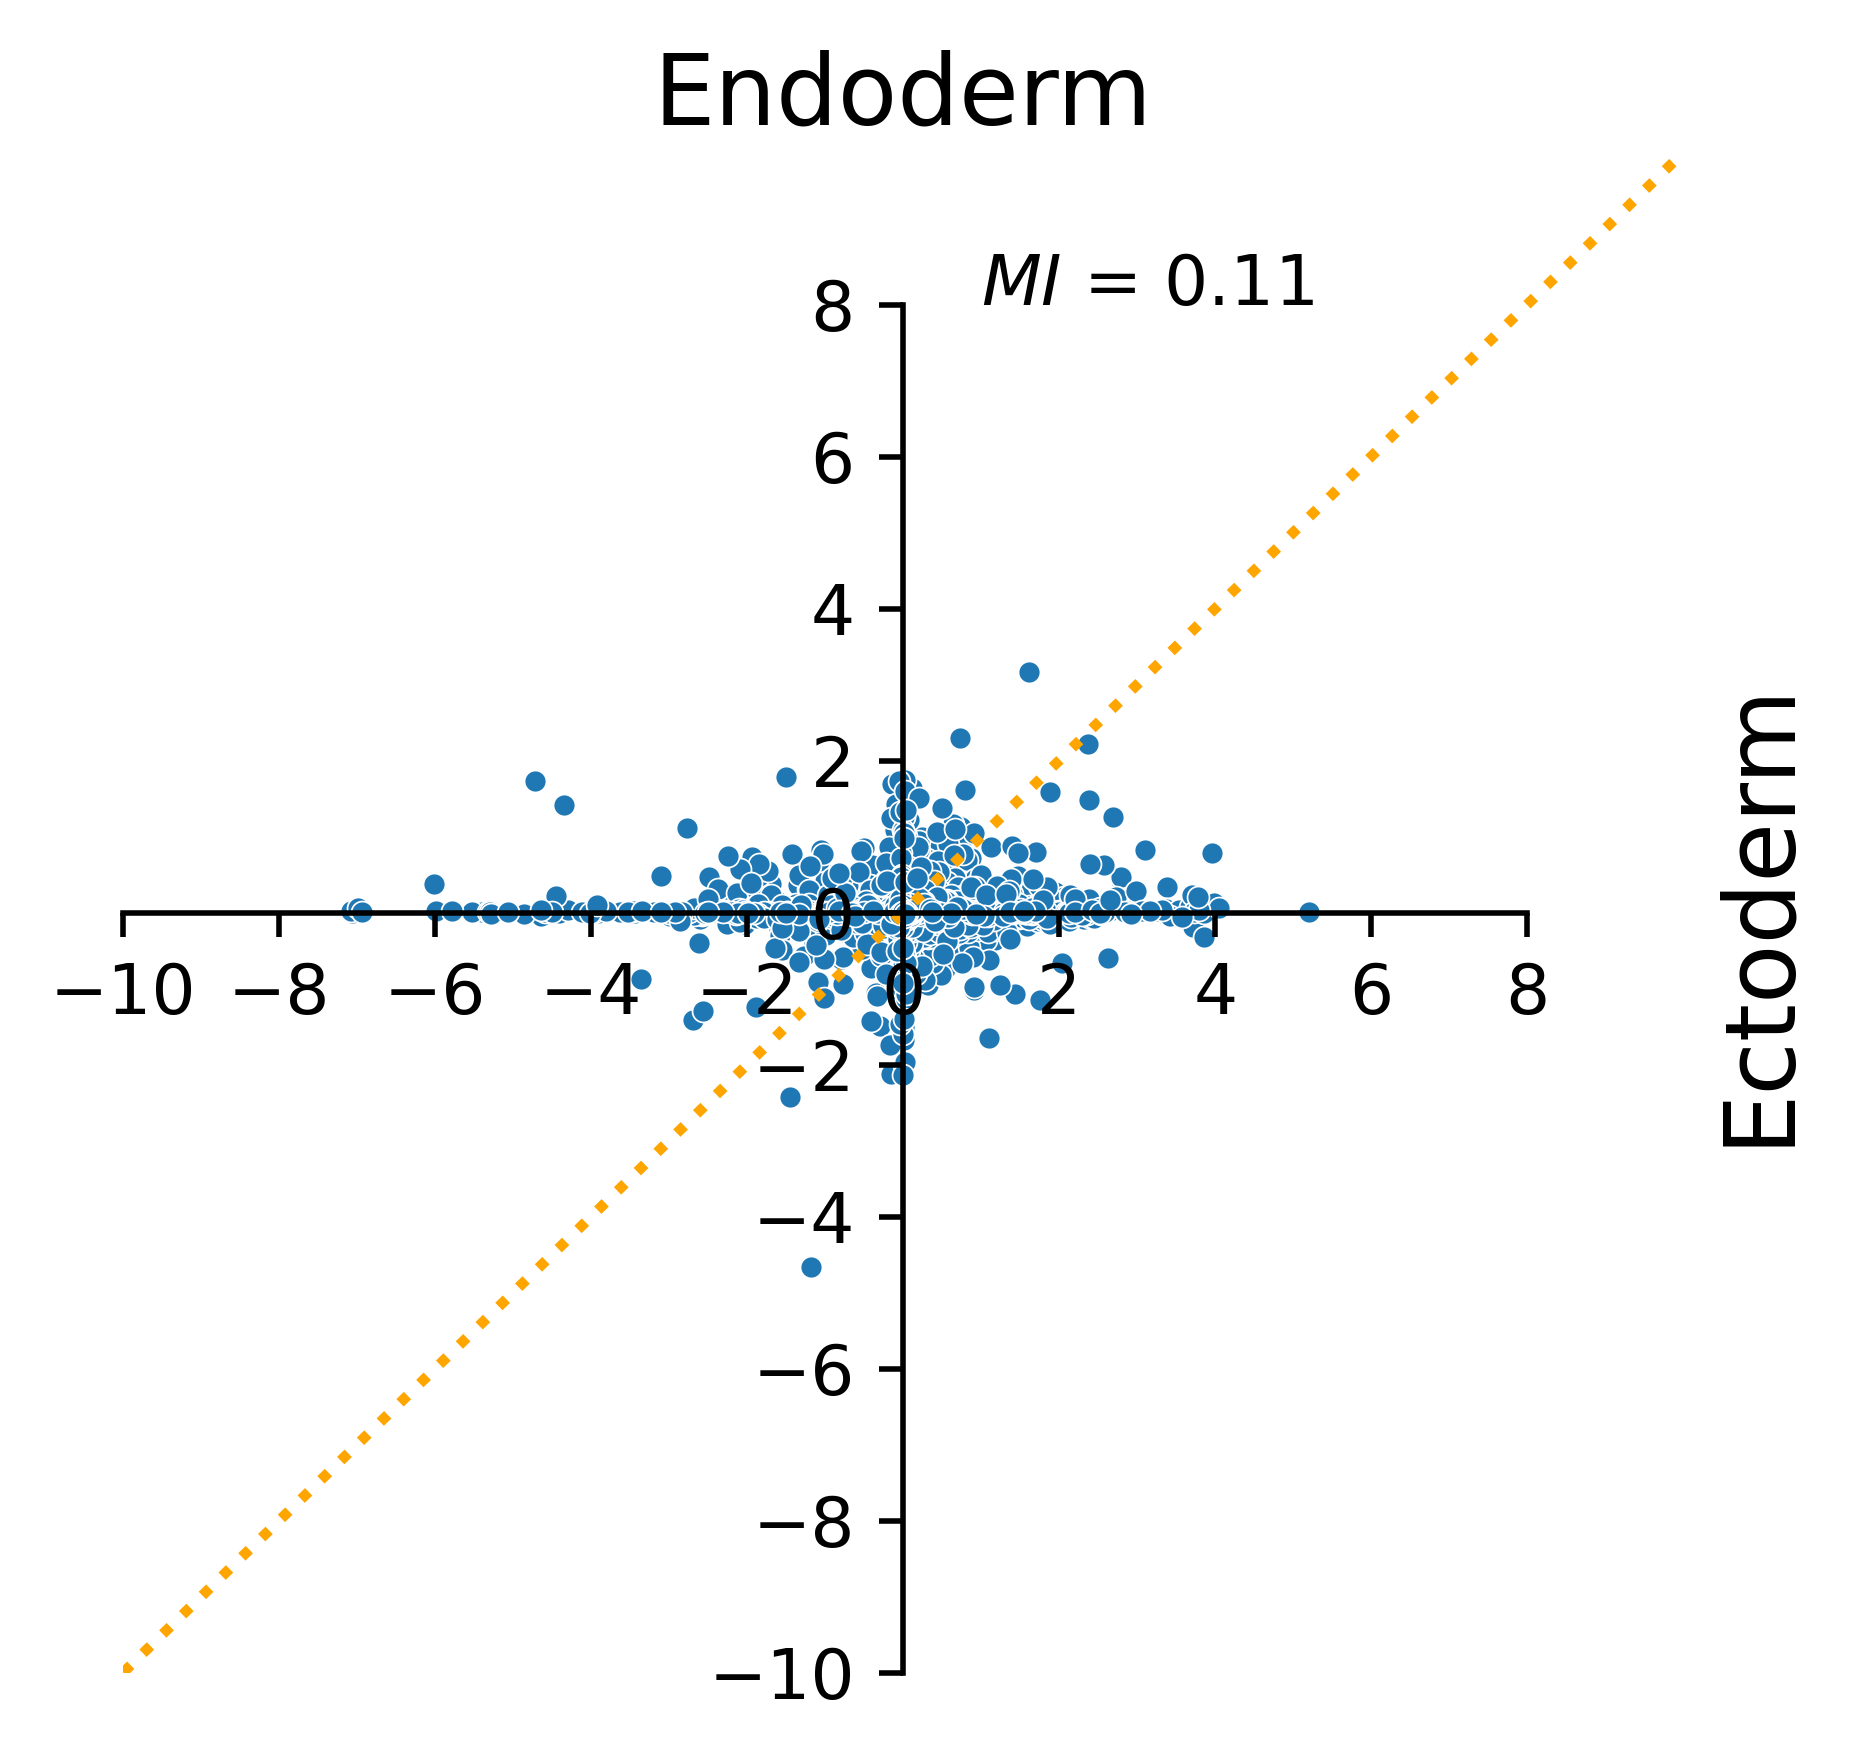

In [36]:
Interpred_data = Log_fold_Interpredibility_mean_hydra(Hydra_data)

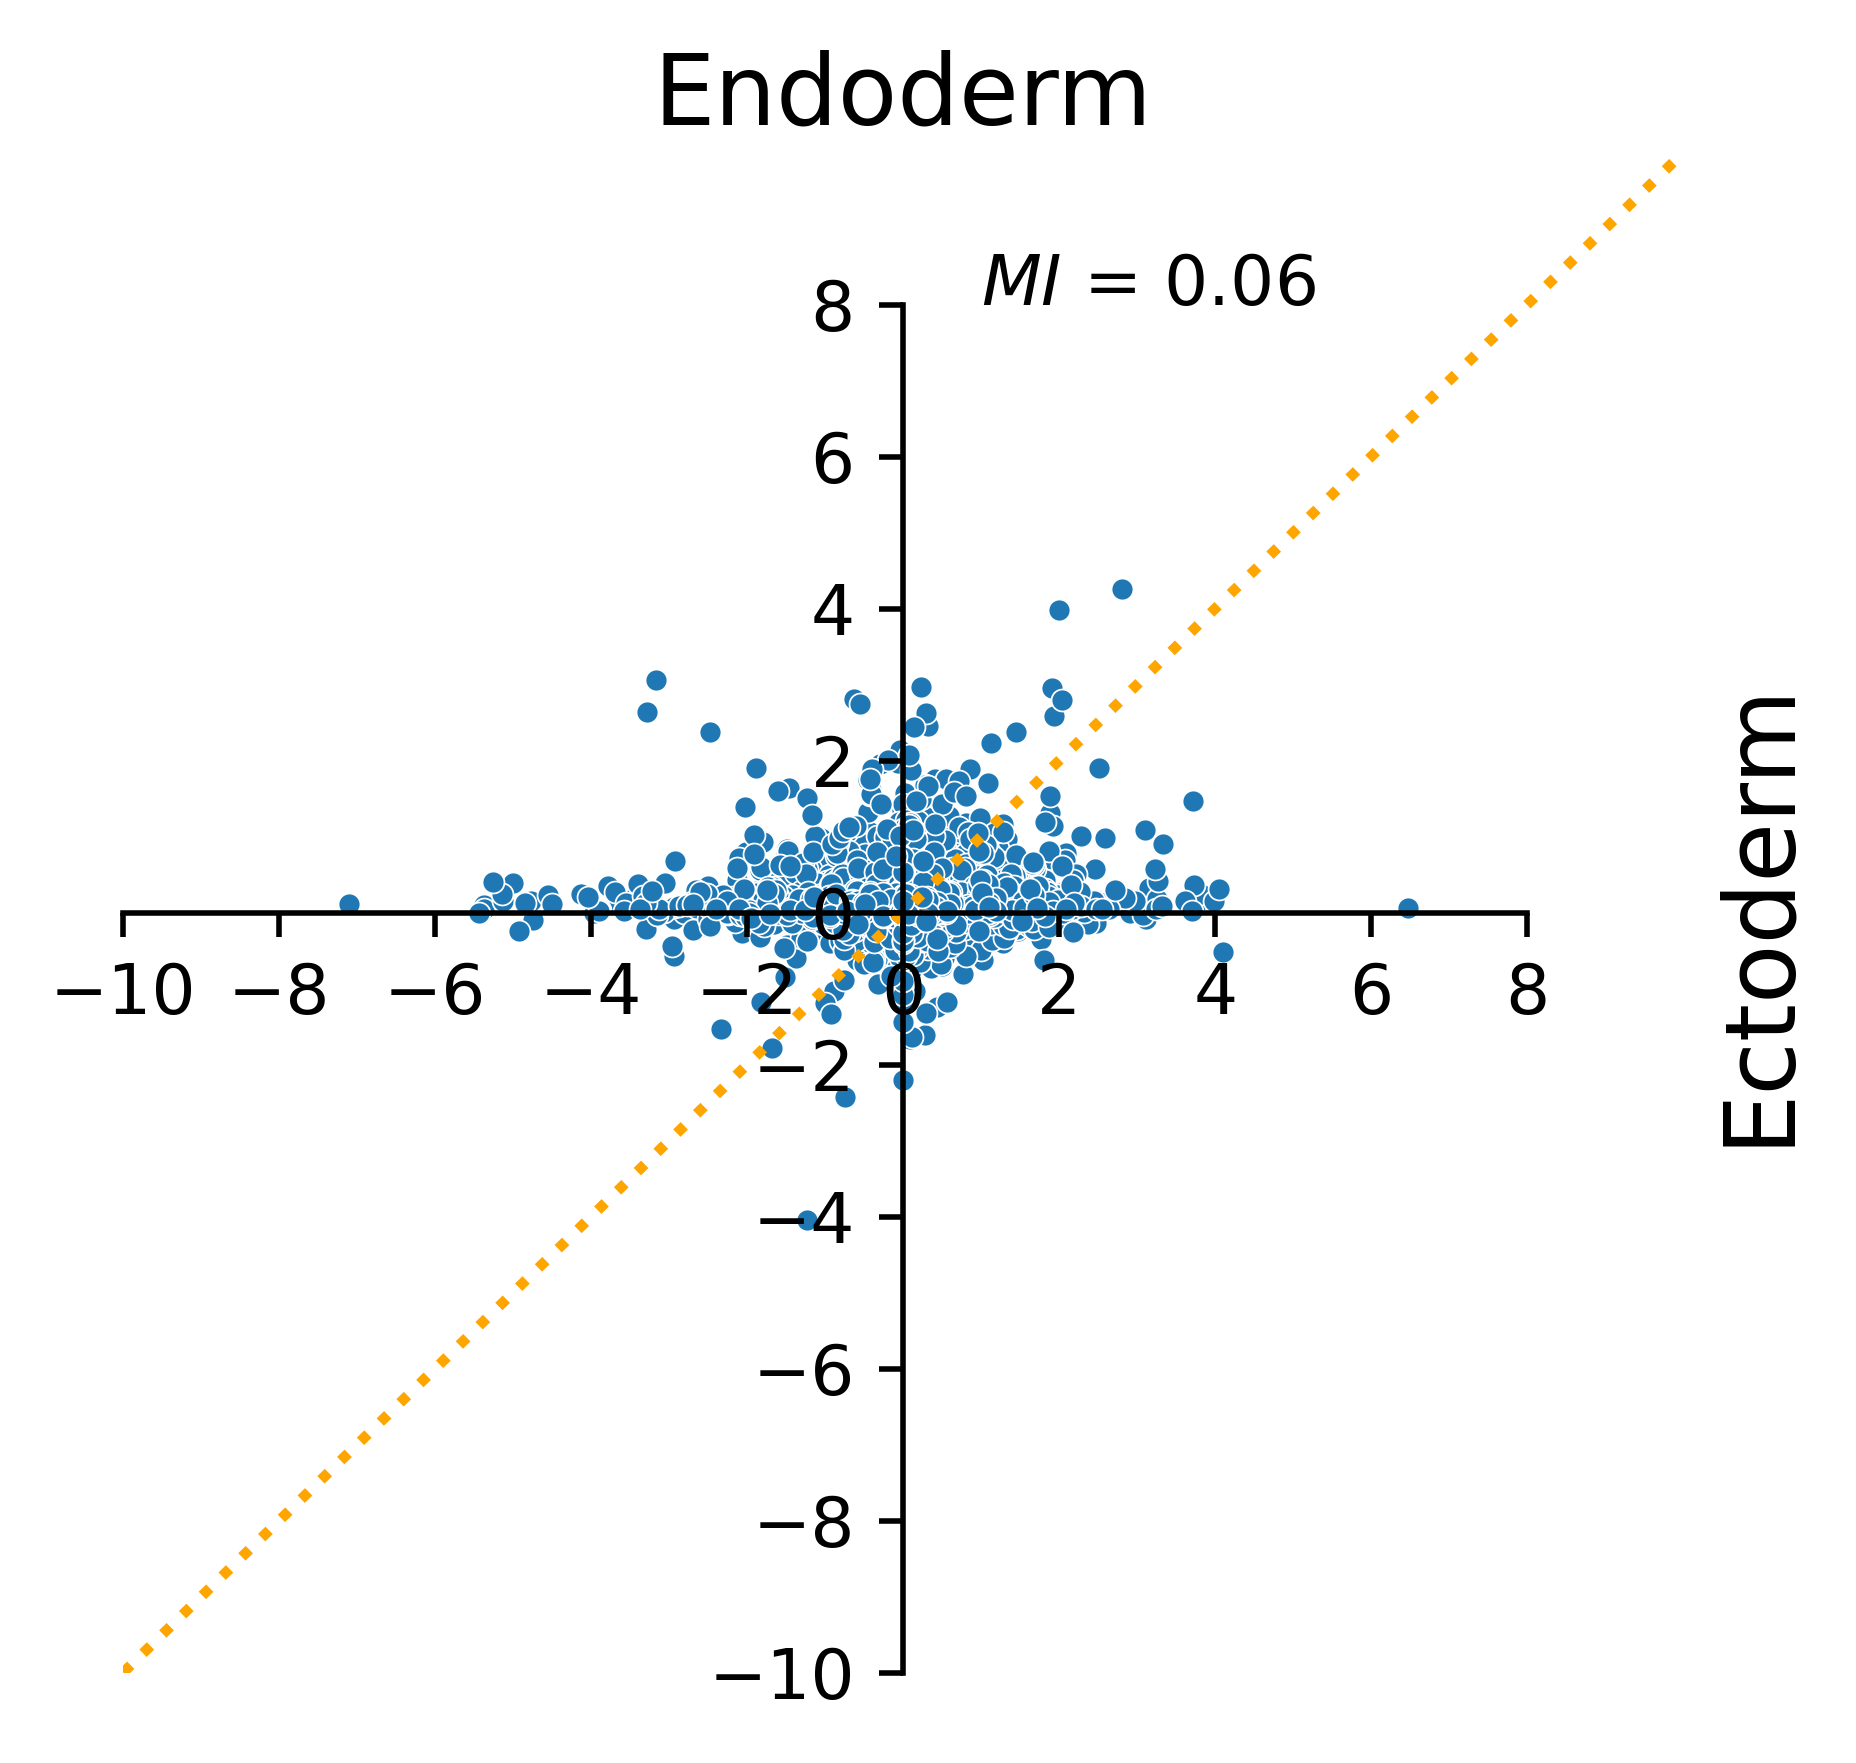

In [37]:
Interpred_data = Log_fold_Interpredibility_var_hydra(Hydra_data)

In [280]:
adata = Hydra_data

In [213]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

In [214]:
sc.tl.rank_genes_groups(adata, 'lineage', method='wilcoxon', key_added = "wilcoxon")

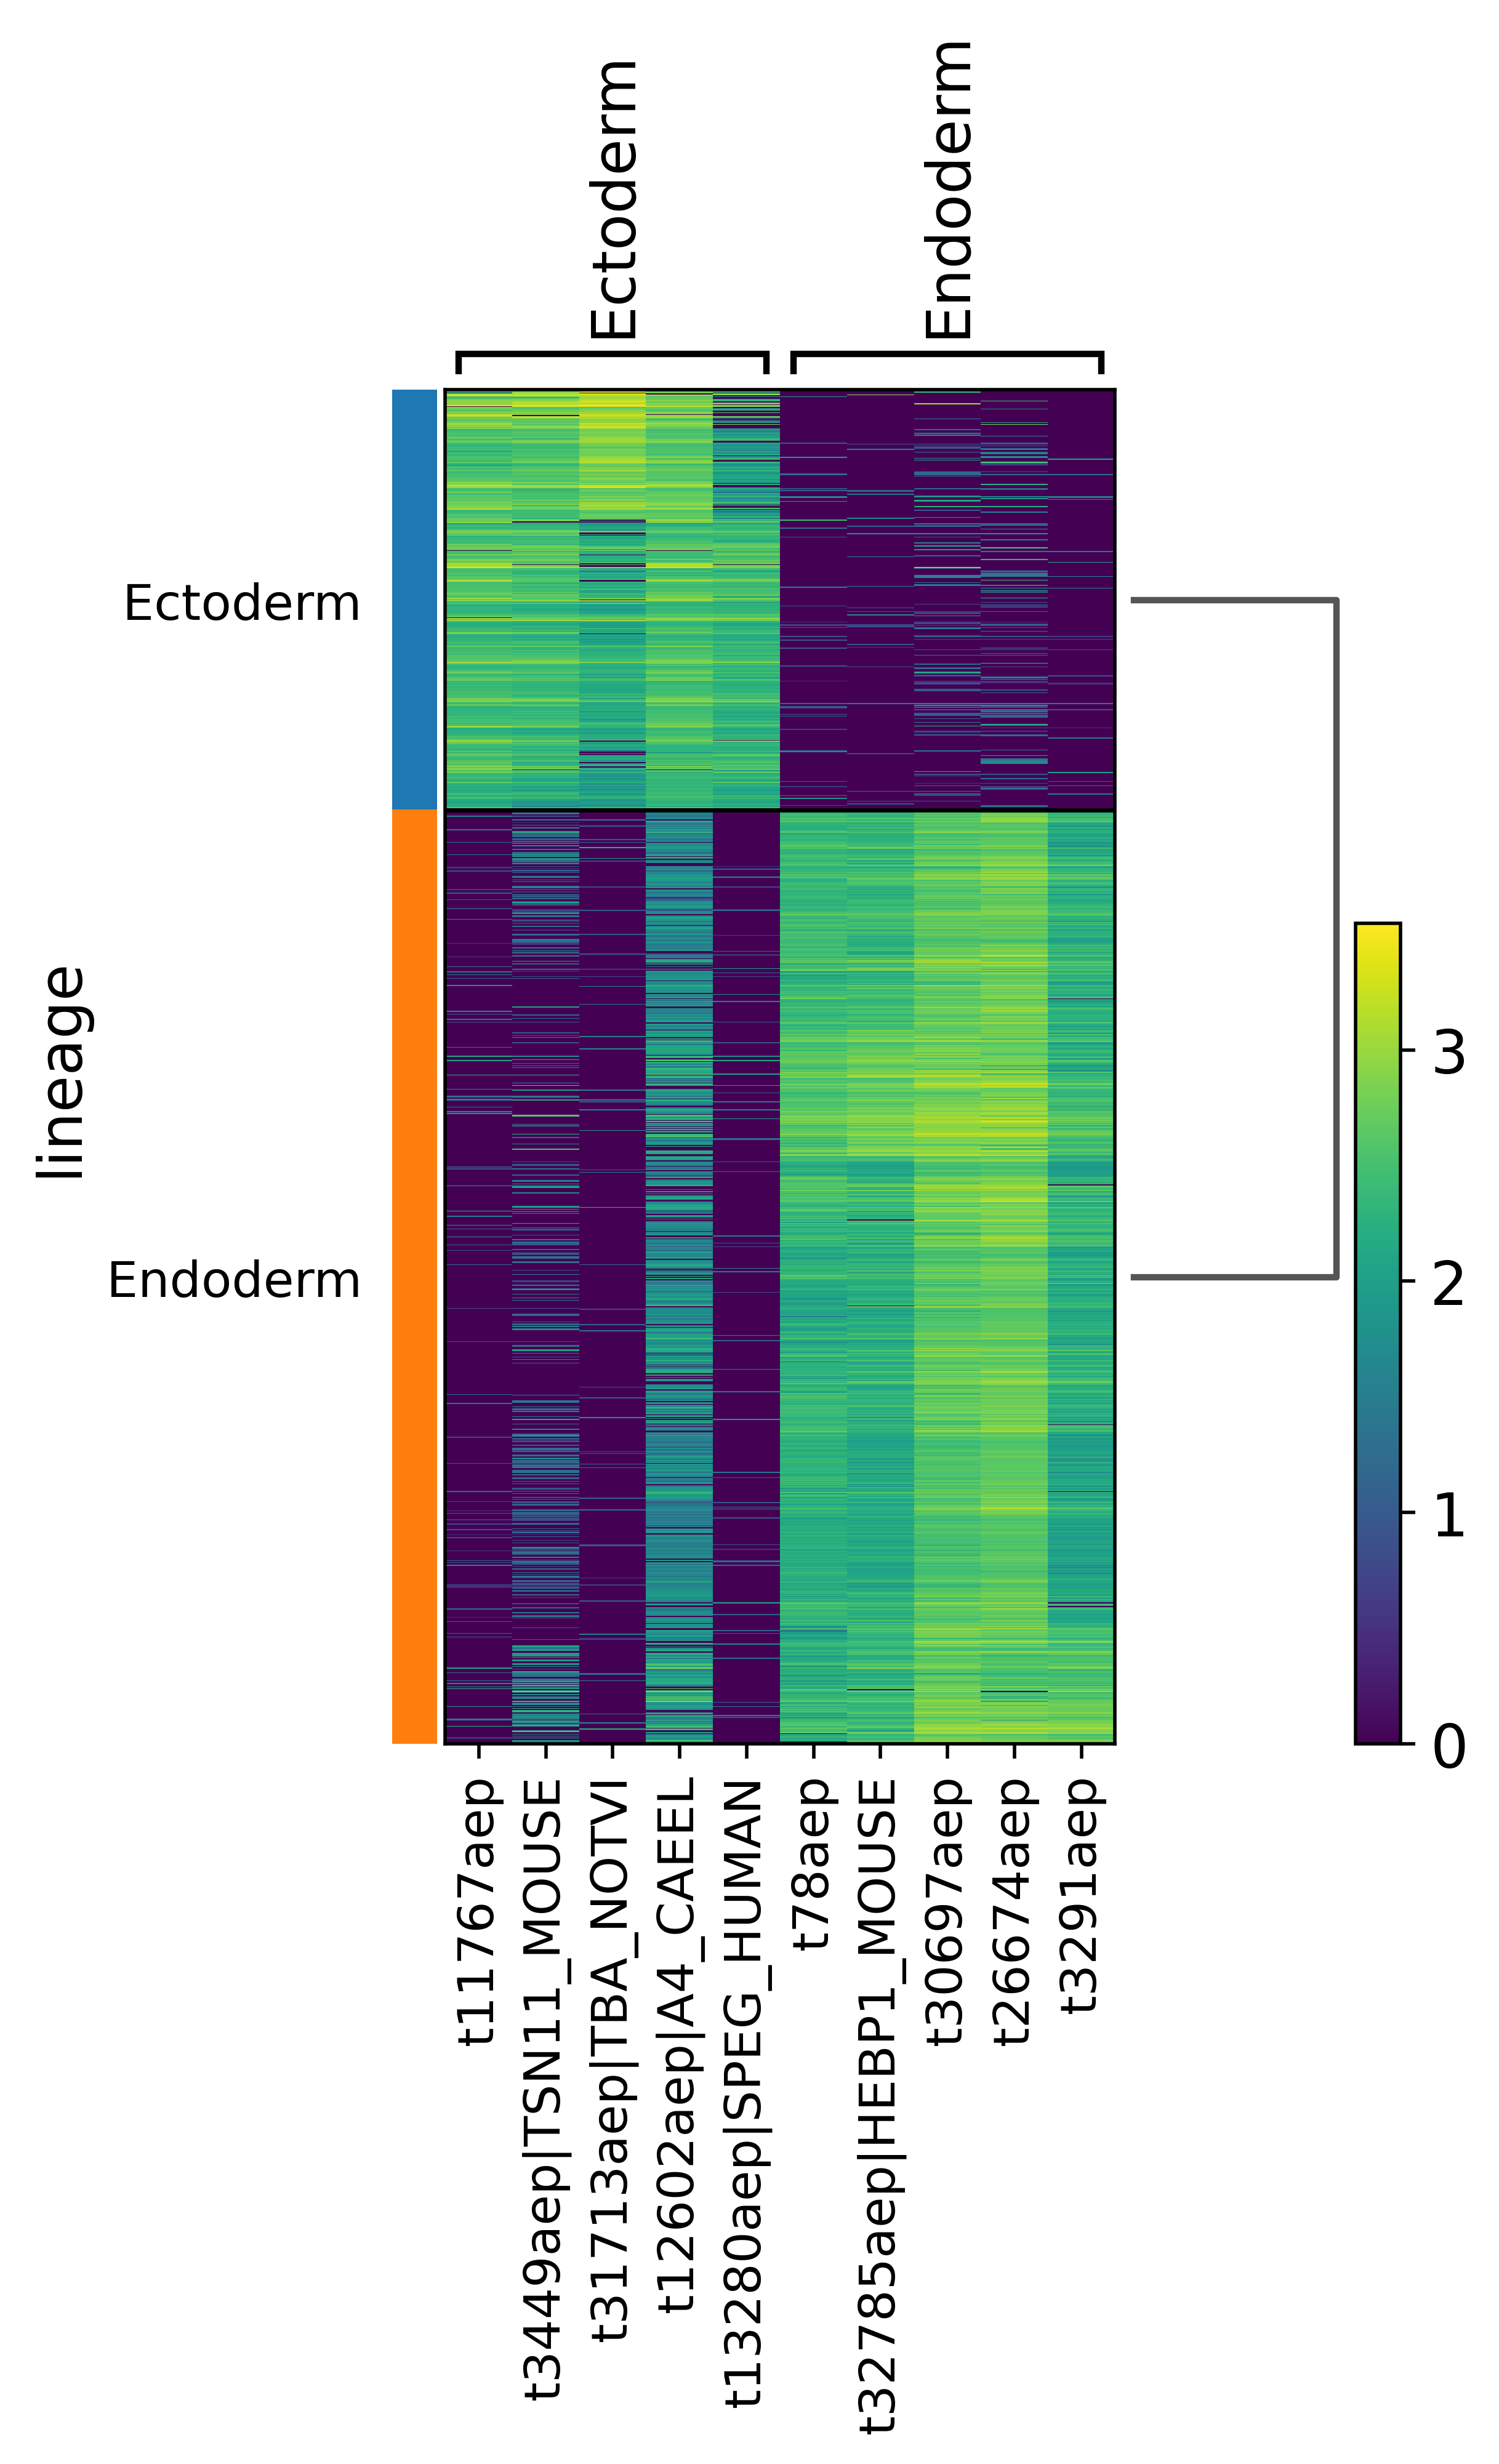

In [142]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, key="wilcoxon", groupby="lineage", show_gene_labels=True)

In [76]:
genes_ecto_prog = adata.uns['wilcoxon']['names']['Ectoderm Progenitors'][adata.uns['wilcoxon']['scores']['Ectoderm Progenitors'] > 0]
genes_endo_prog = adata.uns['wilcoxon']['names']['Endoderm Progenitors'][adata.uns['wilcoxon']['scores']['Endoderm Progenitors'] > 0]
genes_ecto_matu = adata.uns['wilcoxon']['names']['Mature Ectoderm'][adata.uns['wilcoxon']['scores']['Mature Ectoderm'] > 0]
genes_endo_matu = adata.uns['wilcoxon']['names']['Mature Endoderm'][adata.uns['wilcoxon']['scores']['Mature Endoderm'] > 0]

In [322]:
genes_endo = adata.uns['wilcoxon']['names']['Endoderm'][(adata.uns['wilcoxon']['scores']['Endoderm'] > 1) | (adata.uns['wilcoxon']['scores']['Endoderm'] < -1)]
genes_ecto = adata.uns['wilcoxon']['names']['Ectoderm'][(adata.uns['wilcoxon']['scores']['Ectoderm'] > 1) | (adata.uns['wilcoxon']['scores']['Ectoderm'] < -1)]

In [323]:
unique_genes = np.unique(np.concatenate((genes_ecto,genes_endo)))

In [324]:
common_genes = np.setdiff1d(Hydra_data.var_names,unique_genes)

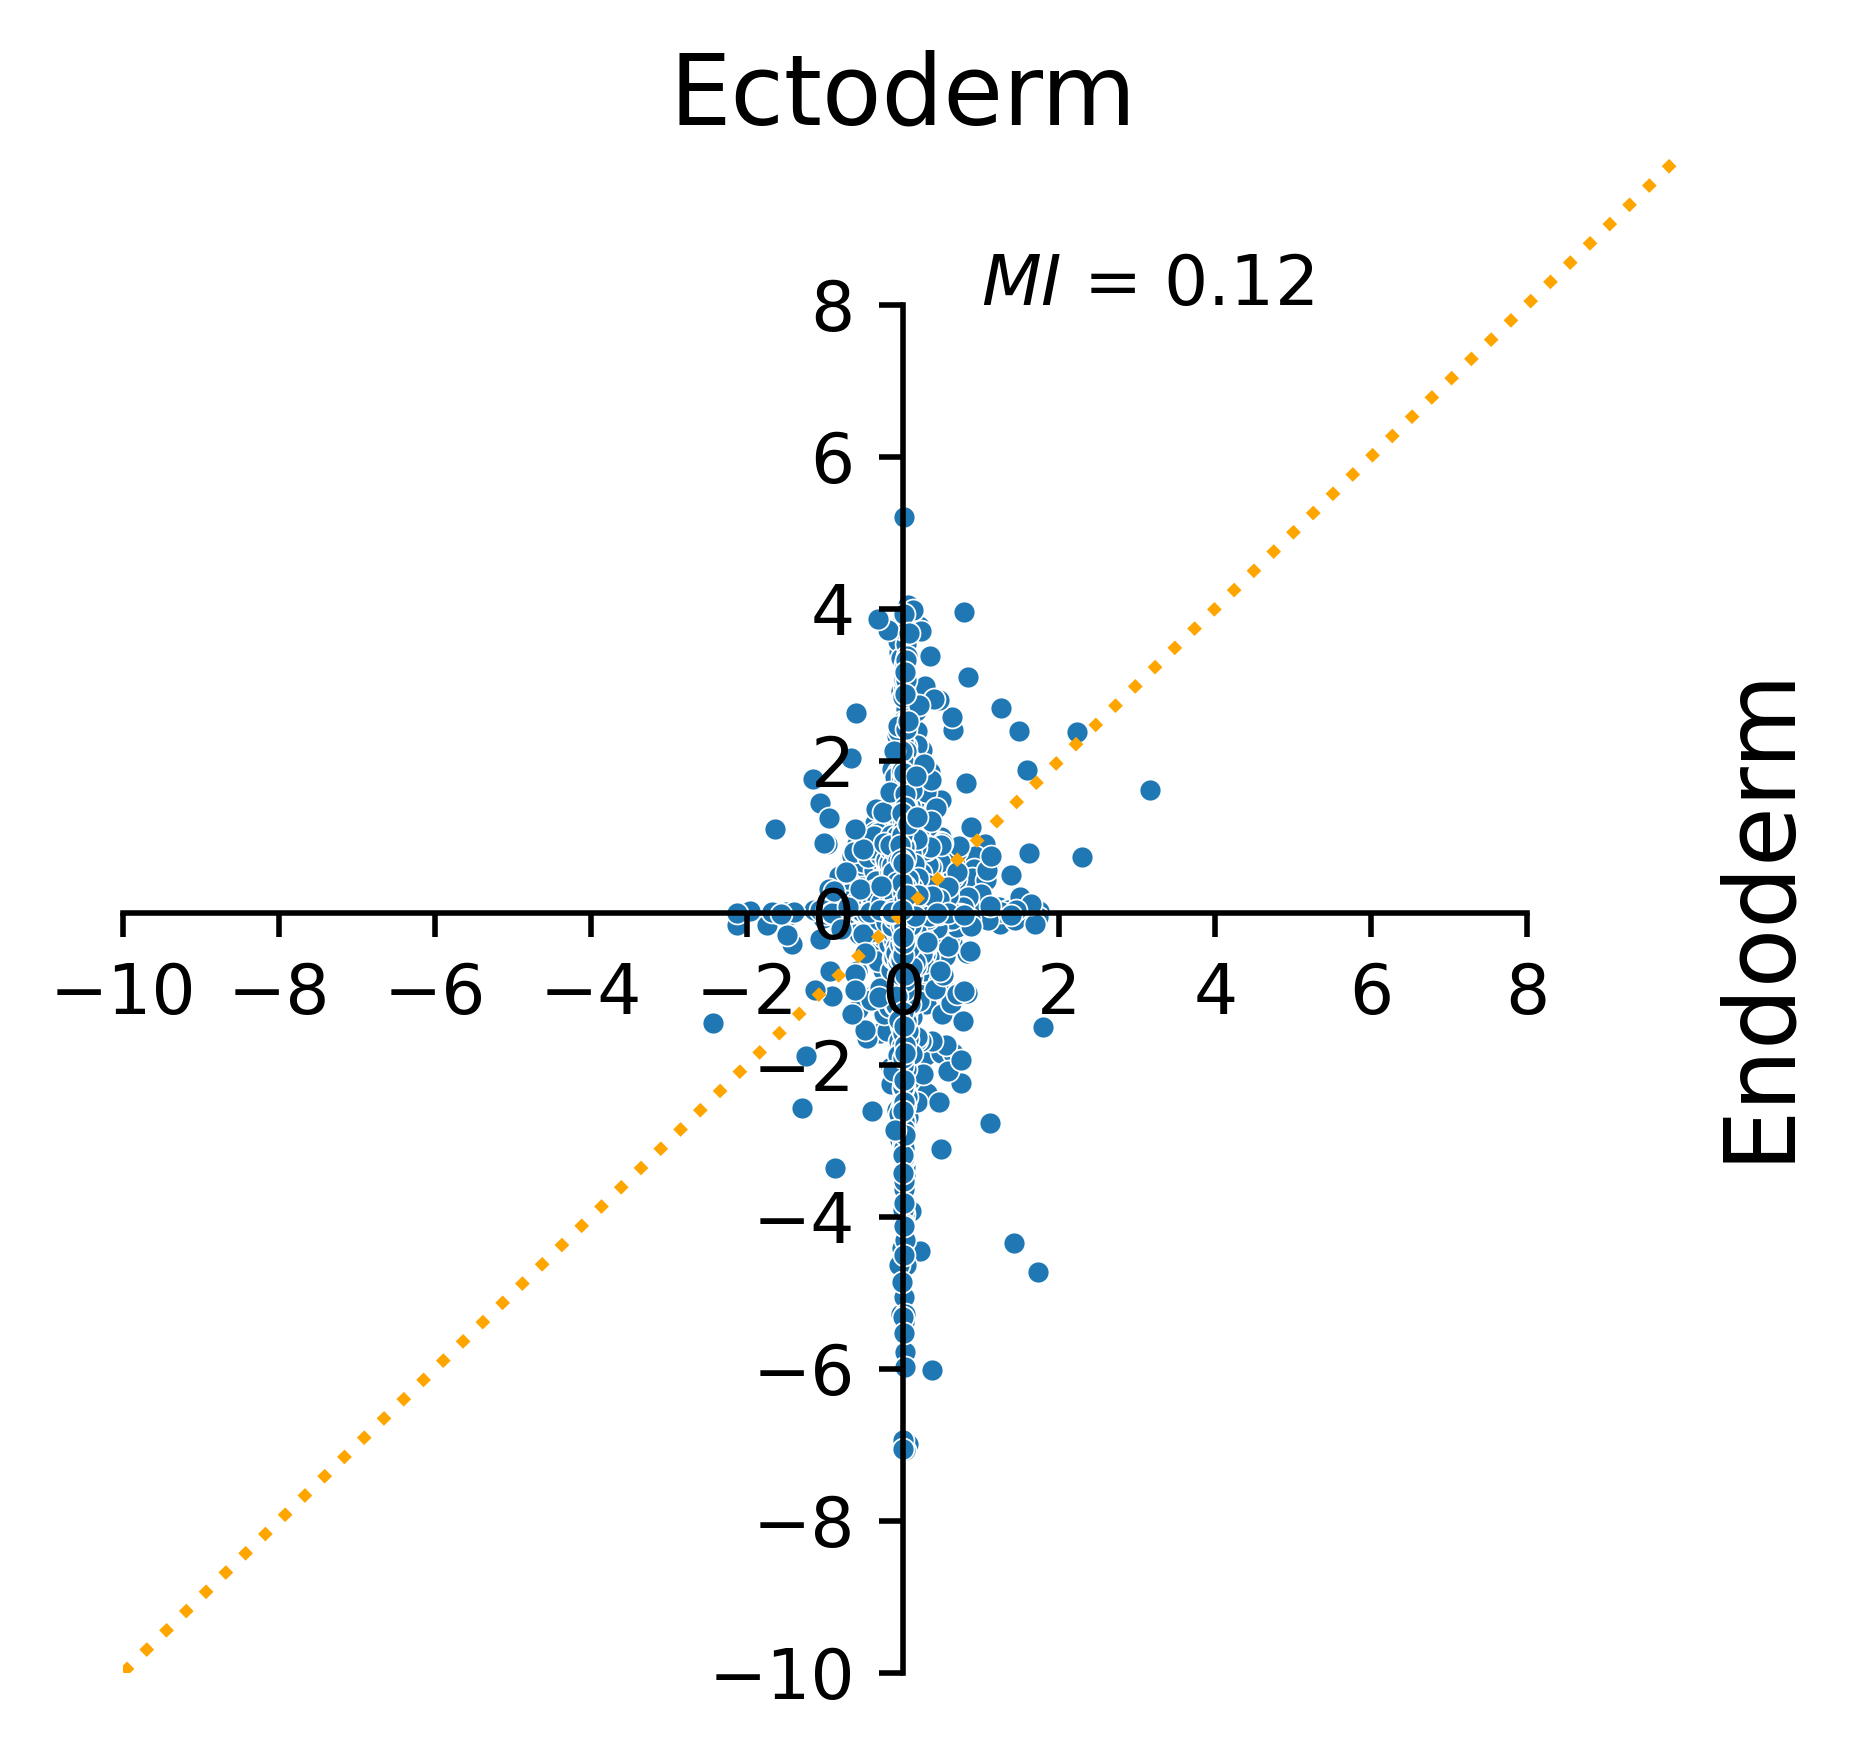

In [325]:
Interpred_data = Log_fold_Interpredibility_mean_hydra(Hydra_data[:,unique_genes])

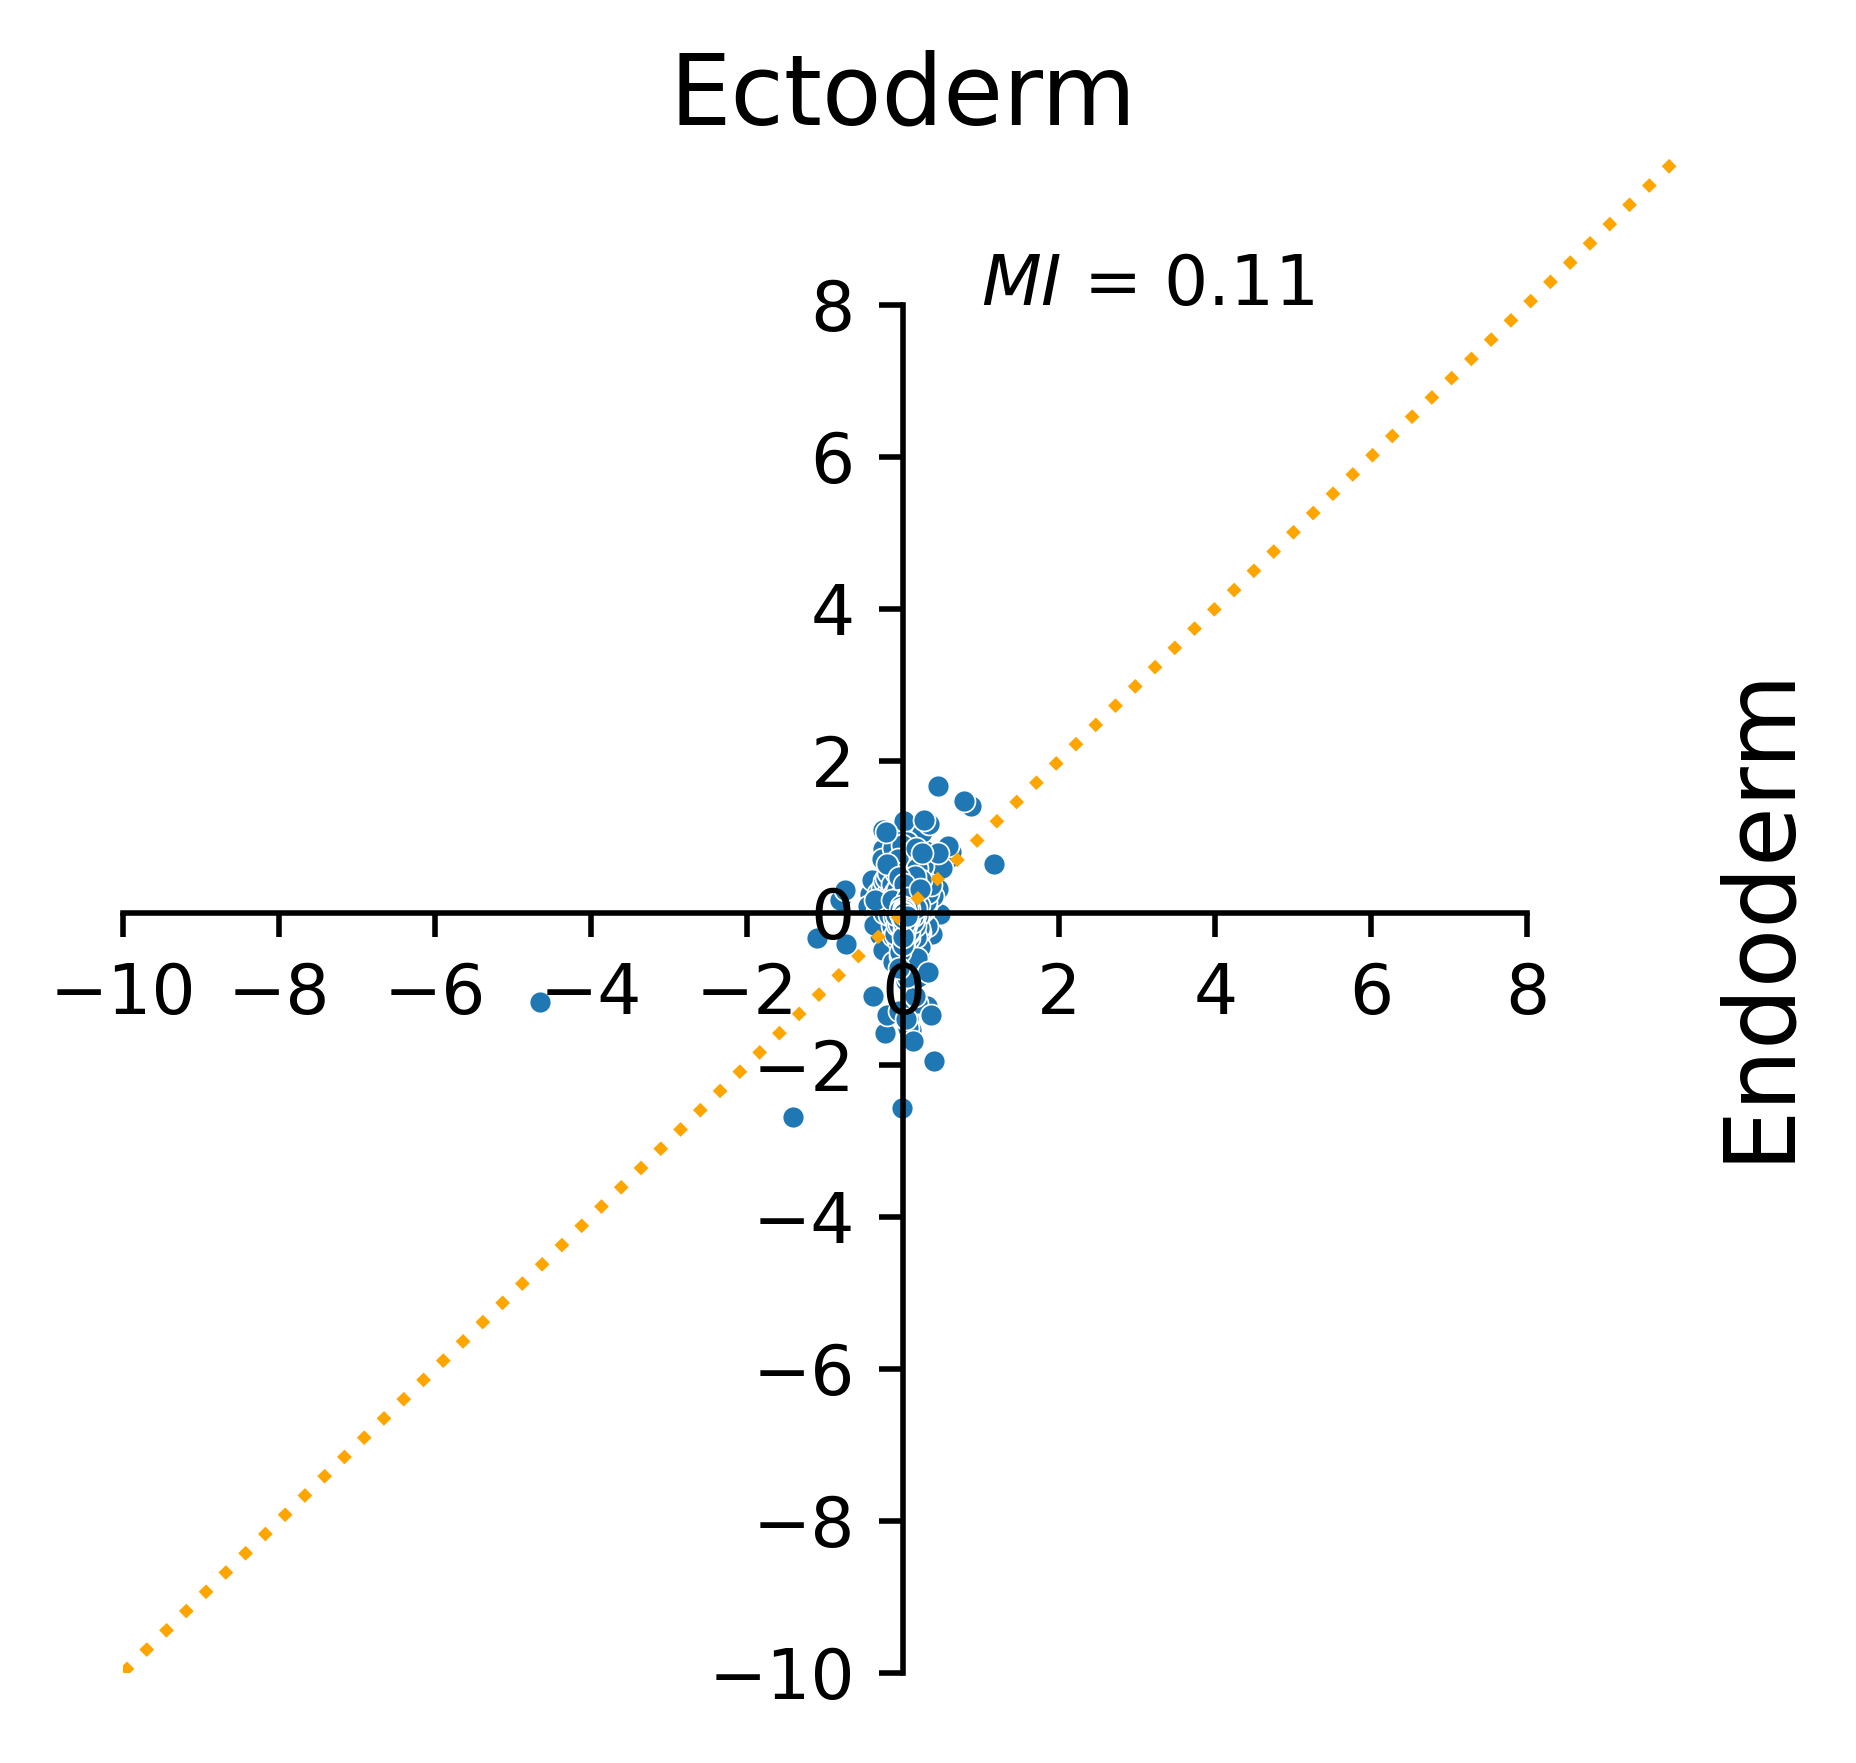

In [326]:
Interpred_data = Log_fold_Interpredibility_mean_hydra(Hydra_data[:,common_genes])

In [329]:
adata_subset = Hydra_data[:,common_genes]
ecto_subset = adata_subset[adata_subset.obs["lineage"] == "Ectoderm"]
endo_subset = adata_subset[adata_subset.obs["lineage"] == "Endoderm"]

In [331]:
ecto_subset.write_h5ad("/home/gaurav/Gaurav/Berlin/Thesis/Paper/Hydra/Data/Objects/ecto_hydra_subset.h5ad")


In [336]:
endo_subset.obs["stim"] = "cm"

In [337]:
endo_subset.write_h5ad("/home/gaurav/Gaurav/Berlin/Thesis/Paper/Hydra/Data/Objects/endo_hydra_subset.h5ad")